In [13]:
from datetime import datetime
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

#url = r'https://ebbd95e4-0888-4d16-8b9a-ec90476163b3.deepnoteproject.com/getSensorData' 
#response = requests.get(url)
#data = response.json()
with open('physical_activity.json', 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data)

timestamps = []
x_data = []
y_data = []
z_data = []

timestamp_factor = 100000000.0
experiment_id = 8 # Walking normal, Walking Stairs, Running Stairs

#orientation_data = [entry for entry in data if entry["sensorId"] == "Orientation Sensor" and entry['experimentId'] == experiment_id]
#gyroscope_data = [entry for entry in data if entry["sensorId"] == "LSM6DSO Gyroscope" and entry['experimentId'] == experiment_id]
accelerometer_data = [entry for entry in data if entry["sensorId"] == "LSM6DSO Accelerometer" and entry['experimentId'] == experiment_id]
#step_counter_data = [entry for entry in data if entry["sensorId"] == "Step Counter Sensor" and entry['experimentId'] == experiment_id]
#step_detector_data = [entry for entry in data if entry["sensorId"] == "Step Detector Sensor" and entry['experimentId'] == experiment_id]

# Acceleration

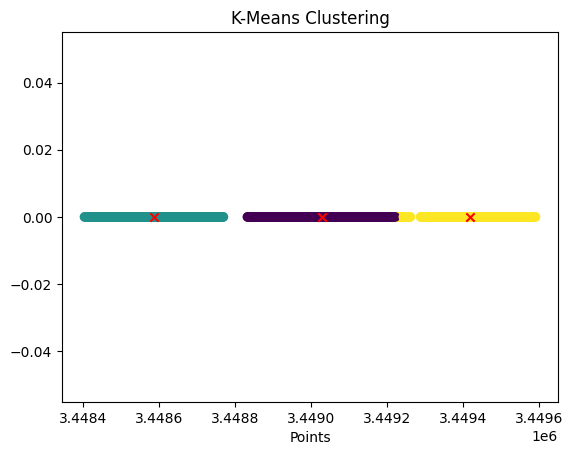

In [17]:
from sklearn.cluster import KMeans


timestamps = [datetime.fromtimestamp(point['timestamp'] / timestamp_factor) for point in accelerometer_data]
int_timestamps = [(point['timestamp'] / timestamp_factor) for point in accelerometer_data]
x_values = [point['data'][0] for point in accelerometer_data]
y_values = [point['data'][1] for point in accelerometer_data]
z_values = [point['data'][2] for point in accelerometer_data]


# Cluster labels
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(np.array(int_timestamps).reshape(-1, 1))
labels = kmeans.labels_

# Plotting
plt.scatter(int_timestamps, np.zeros_like(int_timestamps), c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_, np.zeros_like(kmeans.cluster_centers_), c='red', marker='x')
plt.title('K-Means Clustering')
plt.xlabel('Points')
plt.show()



In [18]:
print(labels)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [24]:
# Calculating magnitude of acceleration in g
magnitude_acceleration = np.sqrt(np.array(x_values)**2 + np.array(y_values)**2 + np.array(z_values)**2) / 9.81

# Create DataFrame
df = pd.DataFrame({
    'Time': timestamps,
    'Cluster': labels,
    'Data': magnitude_acceleration
})


In [29]:
average_distance_walking = np.mean(df[df['Cluster'] == 0]['Data'])
average_distance_stairs = np.mean(df[df['Cluster'] == 1]['Data'])
average_distance_running_stairs = np.mean(df[df['Cluster'] == 2]['Data'])

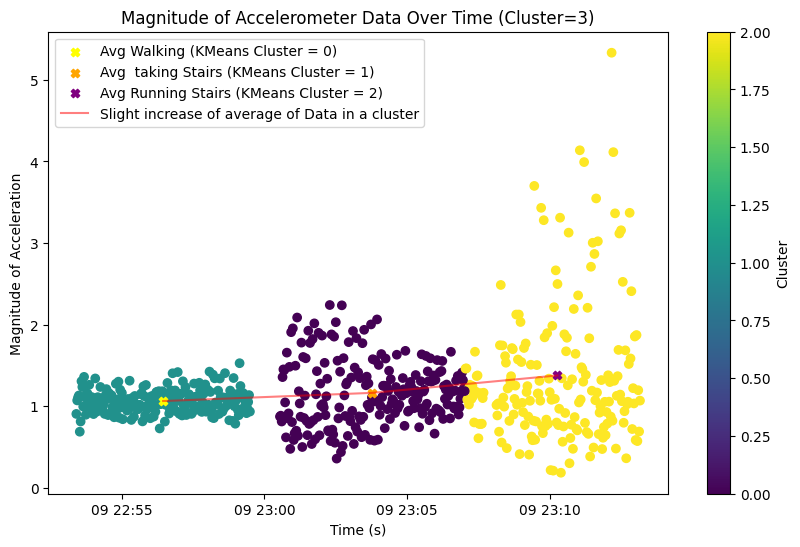

In [53]:
# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Time'], df['Data'], c=df['Cluster'], cmap='viridis')
plt.scatter(df['Time'][df['Cluster'] == 1].mean(), average_distance_stairs, color='Yellow', marker='X', label='Avg Walking (KMeans Cluster = 0)')
plt.scatter(df['Time'][df['Cluster'] == 0].mean(), average_distance_walking, color='orange', marker='X', label='Avg  taking Stairs (KMeans Cluster = 1)')
plt.scatter(df['Time'][df['Cluster'] == 2].mean(), average_distance_running_stairs, color='purple', marker='X', label='Avg Running Stairs (KMeans Cluster = 2)')

plt.plot([df['Time'][df['Cluster'] == 1].mean(), df['Time'][df['Cluster'] == 0].mean(), df['Time'][df['Cluster'] == 2].mean()],
         [average_distance_stairs, average_distance_walking, average_distance_running_stairs],
         linestyle='-', color='red', alpha=0.5, label="Slight increase of average of Data in a cluster")  # Adjust linestyle and color as needed

plt.title('Magnitude of Accelerometer Data Over Time (Cluster=3)')
plt.xlabel('Time (s)')
plt.ylabel('Magnitude of Acceleration')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.show()
